In [ ]:
pip install roboflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 97.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
from roboflow import Roboflow

rf = Roboflow(api_key="xgcChRCI8v4AgijsjNUU")               # o usa ROBOFLOW_API_KEY
project = rf.project("tesis-um-n0pxr")                 # identifica tu proyecto
model   = project.version(2).model                     # versión 2

# inferir en una imagen local
result = model.predict("/content/parada_991_zoom_20.png", confidence=40, overlap=30).json()
print(result)


{'predictions': [{'x': 345.2518615722656, 'y': 367.2972106933594, 'width': 61.69403076171875, 'height': 58.57342529296875, 'confidence': 0.8124003410339355, 'class': 'bus-stop', 'class_id': 0, 'detection_id': '1cdab58c-11f7-48bd-9ea5-8c7d9fb82847', 'image_path': '/content/parada_991_zoom_20.png', 'prediction_type': 'ObjectDetectionModel'}], 'image': {'width': '640', 'height': '640'}}


array([[[138, 138, 131],
        [138, 138, 131],
        [123, 131, 123],
        ...,
        [ 35,  54,  54],
        [ 35,  54,  54],
        [ 23,  30,  30]],

       [[123, 131, 123],
        [123, 131, 123],
        [123, 123, 114],
        ...,
        [ 35,  54,  54],
        [ 39,  42,  42],
        [ 23,  30,  30]],

       [[114, 123, 107],
        [114, 123, 107],
        [103, 118, 103],
        ...,
        [ 35,  54,  54],
        [ 39,  42,  42],
        [ 23,  30,  30]],

       ...,

       [[146, 146, 150],
        [146, 146, 150],
        [146, 146, 150],
        ...,
        [ 21,  25,  22],
        [ 21,  25,  22],
        [ 14,  21,  19]],

       [[146, 146, 150],
        [146, 146, 150],
        [150, 150, 150],
        ...,
        [ 14,  21,  19],
        [ 21,  25,  22],
        [ 14,  21,  19]],

       [[146, 146, 150],
        [146, 146, 150],
        [146, 146, 150],
        ...,
        [ 14,  21,  19],
        [ 21,  25,  22],
        [ 21,  25,  22]]], dtype=uint8)
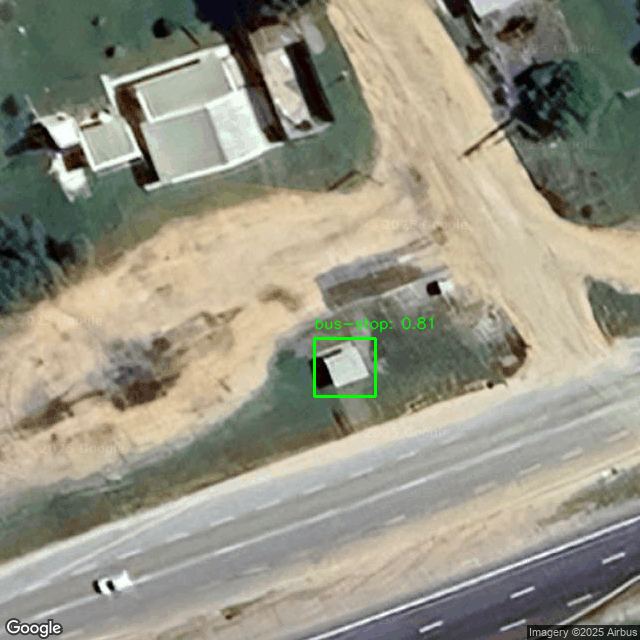

In [ ]:
import cv2
import numpy as np
# from google.colab.output import display # Removed this line

# Load the image
image_path = "/content/parada_991_zoom_20.png"
image = cv2.imread(image_path)

# Check if the image was loaded successfully
if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    # Get the predictions from the result dictionary
    predictions = result.get('predictions', [])

    # Draw bounding boxes and labels on the image
    for prediction in predictions:
        x = int(prediction['x'])
        y = int(prediction['y'])
        width = int(prediction['width'])
        height = int(prediction['height'])
        class_name = prediction['class']
        confidence = prediction['confidence']

        # Calculate coordinates for the bounding box
        x_min = int(x - width / 2)
        y_min = int(y - height / 2)
        x_max = int(x + width / 2)
        y_max = int(y + height / 2)

        # Draw the bounding box
        color = (0, 255, 0)  # Green color for the bounding box
        thickness = 2
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, thickness)

        # Put the label and confidence
        label = f"{class_name}: {confidence:.2f}"
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.5
        font_thickness = 1
        text_size, _ = cv2.getTextSize(label, font, font_scale, font_thickness)
        text_x = x_min
        text_y = y_min - 10  # Position the text slightly above the bounding box

        # Ensure text is not above the image boundary
        if text_y < 0:
            text_y = y_max + 20

        cv2.putText(image, label, (text_x, text_y), font, font_scale, color, font_thickness, cv2.LINE_AA)

    # Display the image using display()
    # Convert the image from BGR to RGB for displaying in Colab
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    display(image_rgb)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os, glob, shutil

# 1. Ajusta tu ruta base (Drive montado):
base_dir = '/content/drive/MyDrive/Imagenes_Satelitales'
imgs = glob.glob(os.path.join(base_dir, '*.png'))

# 2. Crea las carpetas destino
etq_dir = os.path.join(base_dir, 'etiquetadas')
noetq_dir = os.path.join(base_dir, 'no_etiquetadas')
os.makedirs(etq_dir, exist_ok=True)
os.makedirs(noetq_dir, exist_ok=True)

# 3. Procesa y separa
for img_path in imgs:
    # inferencia
    result = model.predict(img_path, confidence=40, overlap=30)
    preds = result.json().get('predictions', [])

    fname = os.path.basename(img_path)
    if preds:
        # guarda la imagen anotada donde haya detecciones
        result.save(os.path.join(etq_dir, fname))
    else:
        # copia la original (o anotada vacía) a no_etiquetadas
        shutil.copy(img_path, os.path.join(noetq_dir, fname))

    print(f"{fname}: {'✅ etiquetada' if preds else '❌ sin etiquetas'}")


parada_1658_zoom_20.png: ❌ sin etiquetas
parada_1475_zoom_20.png: ❌ sin etiquetas
parada_991_zoom_20.png: ✅ etiquetada
parada_1220_zoom_20.png: ✅ etiquetada
parada_110_zoom_20.png: ❌ sin etiquetas
parada_438_zoom_20.png: ✅ etiquetada
parada_952_zoom_20.png: ✅ etiquetada
parada_878_zoom_20.png: ✅ etiquetada
parada_1293_zoom_20.png: ❌ sin etiquetas
parada_751_zoom_20.png: ✅ etiquetada
parada_752_zoom_20.png: ✅ etiquetada
parada_753_zoom_20.png: ✅ etiquetada
parada_754_zoom_20.png: ❌ sin etiquetas
parada_755_zoom_20.png: ✅ etiquetada
parada_756_zoom_20.png: ❌ sin etiquetas
parada_757_zoom_20.png: ✅ etiquetada
parada_758_zoom_20.png: ✅ etiquetada
parada_759_zoom_20.png: ✅ etiquetada
parada_760_zoom_20.png: ✅ etiquetada
parada_761_zoom_20.png: ✅ etiquetada
parada_762_zoom_20.png: ✅ etiquetada
parada_763_zoom_20.png: ✅ etiquetada
parada_764_zoom_20.png: ✅ etiquetada
parada_765_zoom_20.png: ❌ sin etiquetas
parada_766_zoom_20.png: ✅ etiquetada
parada_767_zoom_20.png: ✅ etiquetada
parada_768_zo